# LECTURE NOTES ON TURBULENT INSTABILITY OF ANTI-DE SITTER SPACETIME by Maliborski and Rostworowski
##  Geoff Cope
##  Univeristy of Utah
##  December 29, 2021 

To see how this is implemented in Mathematica see the notebook below:

https://blackholes.tecnico.ulisboa.pt/nrhep2/?page=material

https://arxiv.org/abs/1308.1235

What needs to be done:  Construct stress energy tensor and also incorporate cosmological constant into field equations

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
l,t,x,theta,phi,Phi,dt,dx,dtheta,dphi = symbols('l t x theta phi Phi dt dx dtheta dphi')

In [4]:
A = Function('A')(t,x)
A

In [5]:
delta = Function('delta')(t,x)
delta

In [6]:
phi = Function('phi')(t,x)
phi

In [7]:
variables = Matrix([t,x,theta,Phi])
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣Φ⎦

In [8]:
differentials = Matrix([dt,dx,dtheta,dphi])
differentials 

⎡  dt  ⎤
⎢      ⎥
⎢  dx  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

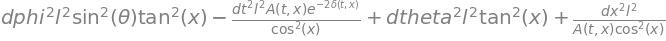

In [9]:
lineElement = expand(trigsimp(expand((l**2/cos(x)**2) * ( -A*exp(-2*delta)*dt**2 + A**-1 * dx**2 + sin(x)**2 * (dtheta**2 + sin(theta)**2*dphi**2)))))
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2          -2⋅δ(t, x)                                                  ⎤
⎢-l ⋅A(t, x)⋅ℯ                                                            ⎥
⎢────────────────────────         0             0               0         ⎥
⎢           2                                                             ⎥
⎢        cos (x)                                                          ⎥
⎢                                                                         ⎥
⎢                                  2                                      ⎥
⎢                                 l                                       ⎥
⎢           0              ───────────────      0               0         ⎥
⎢                                     2                                   ⎥
⎢                          A(t, x)⋅cos (x)                                ⎥
⎢                                                                         ⎥
⎢                                            2    2                       ⎥
⎢           

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  2          -2⋅δ(t, x)                                                  ⎤
⎢-l ⋅A(t, x)⋅ℯ                                                            ⎥
⎢────────────────────────         0             0               0         ⎥
⎢           2                                                             ⎥
⎢        cos (x)                                                          ⎥
⎢                                                                         ⎥
⎢                                  2                                      ⎥
⎢                                 l                                       ⎥
⎢           0              ───────────────      0               0         ⎥
⎢                                     2                                   ⎥
⎢                          A(t, x)⋅cos (x)                                ⎥
⎢                                                                         ⎥
⎢                                            2    2                       ⎥
⎢           

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t x theta Phi")
t,x,theta,Phi = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                   ∂                                       ∂                ⎤  ⎡⎛                             ∂             ∂          
⎢⎢                   ──(A(t, x))                             ──(A(t, x))      ⎥  ⎢⎜2⋅A(t, x)⋅tan(x) - 2⋅A(t, x)⋅──(δ(t, x)) + ──(A(t, x))
⎢⎢     ∂             ∂t                        ∂             ∂x               ⎥  ⎢⎝                             ∂x            ∂x         
⎢⎢   - ──(δ(t, x)) + ───────────      tan(x) - ──(δ(t, x)) + ───────────  0  0⎥  ⎢───────────────────────────────────────────────────────
⎢⎢     ∂t             2⋅A(t, x)                ∂x             2⋅A(t, x)       ⎥  ⎢                                     2                 
⎢⎢                                                                            ⎥  ⎢                                                       
⎢⎢                       ∂                   2⋅δ(t, x) ∂                      ⎥  ⎢                                ∂                      
⎢⎢                       ──(A(t, x

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛                                                                                                                                       
⎢⎜                                                                                                                                       
⎢⎜ 4              ∂                                                                                                                      
⎢⎜A (t, x)⋅sin(x)⋅──(δ(t, x))                                                                             2              2               
⎢⎜                ∂x             4          3    ∂                4          2       4       ⎛∂          ⎞     4        ∂                
⎢⎜─────────────────────────── + A (t, x)⋅tan (x)⋅──(δ(t, x)) + 3⋅A (t, x)⋅tan (x) + A (t, x)⋅⎜──(δ(t, x))⎟  - A (t, x)⋅───(δ(t, x)) + 3⋅A
⎢⎜             3                                 ∂x                                          ⎝∂x         ⎠               2               
⎢⎝          cos (x)               

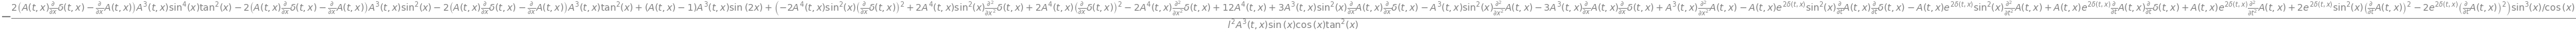

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛                                                                                                                                       
⎢⎜                                                                                                                                       
⎢⎜ 4              ∂                                                                                                                      
⎢⎜A (t, x)⋅sin(x)⋅──(δ(t, x))                                                                             2              2               
⎢⎜                ∂x             4          3    ∂                4          2       4       ⎛∂          ⎞     4        ∂                
⎢⎜─────────────────────────── + A (t, x)⋅tan (x)⋅──(δ(t, x)) + 3⋅A (t, x)⋅tan (x) + A (t, x)⋅⎜──(δ(t, x))⎟  - A (t, x)⋅───(δ(t, x)) + 3⋅A
⎢⎜             3                                 ∂x                                          ⎝∂x         ⎠               2               
⎢⎝          cos (x)               

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡⎛                                                     ⎛                                                                              2  
⎢⎜  ⎛            ∂             ∂          ⎞  3         ⎜   4          3    ∂                4          2         4       ⎛∂          ⎞   
⎢⎜2⋅⎜- 2⋅A(t, x)⋅──(δ(t, x)) + ──(A(t, x))⎟⋅A (t, x) + ⎜2⋅A (t, x)⋅tan (x)⋅──(δ(t, x)) + 6⋅A (t, x)⋅tan (x) + 2⋅A (t, x)⋅⎜──(δ(t, x))⎟  -
⎢⎜  ⎝            ∂x            ∂x         ⎠            ⎜                   ∂x                                            ⎝∂x         ⎠   
⎢⎝                                                     ⎝                                                                                 
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                                                                        
⎢                                 

In [38]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡⎛                                                        ∂                          ∂                                       ⎞          -
⎢⎜-48.0⋅A(t, x)⋅cos(x) + 16⋅A(t, x)⋅cos(3⋅x) - 8.0⋅sin(x)⋅──(A(t, x)) - 8.0⋅sin(3⋅x)⋅──(A(t, x)) + 24.0⋅cos(x) + 8.0⋅cos(3⋅x)⎟⋅A(t, x)⋅ℯ 
⎢⎝                                                        ∂x                         ∂x                                      ⎠           
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                        2⋅(2⋅cos(x) - cos(3⋅x) - cos(5⋅x))                                              
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                 

In [24]:
Phi = Function('Phi')(t,x)
Phi

In [25]:
Pi = Function('Pi')(t,x)
Pi

In [26]:
equation12a = Eq(Phi,diff(phi,x))
equation12a

In [34]:
equation12b = Eq(Pi, (A**-1 * exp(delta) * diff(phi,t)))
equation12b

In [36]:
dphidx = Eq( diff(phi,x),solve(equation12a, diff(phi,x))[0] ) 
dphidx

In [37]:
dphidt = Eq( diff(phi,t),solve(equation12b, diff(phi,t))[0] ) 
dphidt